In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
import seaborn as sns
from collections import Counter as Ct

num_uniq = 7

In [121]:
class Game():
    def __init__(self):
        self.num_uniq = num_uniq
        
        # board[i] % num_uniq represents the unique card number (image on card)
        # board[i] // num_uniq represents the instance number of that image (0th Cow, 1st Cow)
        # board[i] == -1 if card has already been matched.
        
        self.board = list(range(self.num_uniq * 2))
        rand.shuffle(self.board)

        self.scores = [0, 0]
        self.toMove = 0 # 0 or 1, which character is about to move
        self.flip = 1 # 1 or 2, what # card we are opening next
        self.flipped = None
        self.flipped_i = None
        
        self.memories = [
            [-1 for _ in range(self.num_uniq * 2)], # -1 is don't remember, -2 is card removed,
            [-1 for _ in range(self.num_uniq * 2)], # otherwise unique card number
        ]
        
        self.forget = [0, 0] # 0 is perfect recall, 1 is perfect forgetfulness
    
    def check_known_match(self):
        move1 = None
        move2 = None
        mem = self.memories[self.toMove]
        for i in range(num_uniq * 2):
            for j in range(i+1, num_uniq * 2):
                if not(mem[i] < 0 or mem[j] < 0):
                    if mem[i] % num_uniq == mem[j] % num_uniq: # match in memory
                        move1 = i
                        move2 = j
                        break
        return move1, move2
    
    def choose_unknown_card(self):
        unknown = []
        mem = self.memories[self.toMove]
        
        for i in range(len(mem)):
            if mem[i] == -1:
                unknown.append(i)
        return rand.choice(unknown)
        
    def flip_card(self, index):
        card_value = self.board[index]
        
        # both players learn the card
        for p in range(2):
            self.memories[p][index] = card_value
            
        if self.flip == 1: # 1st flip
            self.flipped = card_value
            self.flipped_i = index
            
        else: # 2nd flip
            if card_value != self.flipped and card_value%num_uniq == self.flipped%num_uniq: # match
                # remove cards from the board
                self.board[self.flipped_i] = -1
                self.board[index] = -1
                
                for p in range(2):
                    self.memories[p][self.flipped_i] = -2
                    self.memories[p][index] = -2
            
                # update score
                self.scores[self.toMove] += 1
                
            else: # no match
                self.toMove = (self.toMove + 1) % 2
            
        self.flip = 1 if self.flip == 2 else 2
        
    def is_game_over(self):
        return all([x == -1 for x in self.board])

In [194]:
repetitions = 2000
p1s = []
p2s = []
diffs = []

for rep in range(repetitions):
    g = Game()
    while not g.is_game_over():
        m1, m2 = g.check_known_match()
        if not m1 is None:
            g.flip_card(m1)
            g.flip_card(m2)

        else:
            card = g.choose_unknown_card()
            g.flip_card(card)
            m1, m2 = g.check_known_match()
            if m1 or m2:
                if m1 == card:
                    g.flip_card(m2)
                else:
                    g.flip_card(m1)
            else:
                card = g.choose_unknown_card()
                g.flip_card(card)
    diffs.append(g.scores[0] - g.scores[1])
    p1s.append(g.scores[0])
    p2s.append(g.scores[1])

0.556


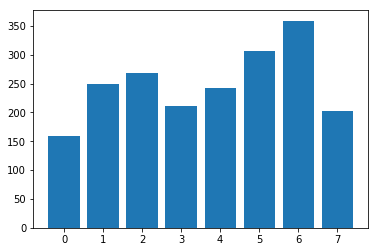

In [201]:
counts = Ct(p1s)
x = list(range(num_uniq + 1))
y = [counts[i] for i in x]
plt.bar(x,y)
win = counts[4] + counts[5] + counts[6] + counts[7]
print(win / repetitions)